In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt



In [7]:
video_path =  r"C:\Users\srira\Downloads\The Shell Game.mp4" 

cap = cv2.VideoCapture(video_path)  

ret, frame_previous = cap.read()

if not ret or frame_previous is None:
    print("Error: Unable to read the video file.")
    cap.release()
    cv2.destroyAllWindows()
else:
    frame_previous_gray = cv2.cvtColor(frame_previous, cv2.COLOR_BGR2GRAY)

    while cap.isOpened():
        ret, frame_current = cap.read()
        if not ret or frame_current is None:
            print("Error: Unable to read the next frame.")
            break

        frame_current_gray = cv2.cvtColor(frame_current, cv2.COLOR_BGR2GRAY)

        hist_prev = cv2.calcHist([frame_previous_gray], [0], None, [256], [0, 256])
        hist_curr = cv2.calcHist([frame_current_gray], [0], None, [256], [0, 256])
        frame_hist_diff = cv2.compareHist(hist_prev, hist_curr, cv2.HISTCMP_CORREL)

        frame_diff = cv2.absdiff(frame_previous_gray, frame_current_gray)
        _, frame_threshold = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)

        event_trigger = 0.9
        if frame_hist_diff < event_trigger:
            print(f"Motion detected at frame {cap.get(cv2.CAP_PROP_POS_FRAMES)}")

        contours, _ = cv2.findContours(frame_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            if cv2.contourArea(c) > 500:
                (x, y, w, h) = cv2.boundingRect(c)
                cv2.rectangle(frame_current, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.imshow("Motion Tracker", frame_current)

        frame_previous_gray = frame_current_gray

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()







Motion detected at frame 126.0
Error: Unable to read the next frame.


In [9]:

input_path = r"C:\Users\srira\Downloads\The Shell Game.mp4"
video = cv2.VideoCapture(input_path)

width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = int(video.get(cv2.CAP_PROP_FPS))

output_file = r"C:\Users\srira\Desktop\IVA 5"
output_video = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), frames_per_second, (width, height))

success, previous_frame = video.read()
previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)
detected_events = []

while video.isOpened():
    success, current_frame = video.read()
    if not success:
        break

    current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    frame_difference = cv2.absdiff(previous_frame_gray, current_frame_gray)
    _, binary_diff = cv2.threshold(frame_difference, 30, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            (x, y, w, h) = cv2.boundingRect(cnt)
            cv2.rectangle(current_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(current_frame, "Motion Event", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            detected_events.append(video.get(cv2.CAP_PROP_POS_MSEC) / 1000)

    output_video.write(current_frame)
    previous_frame_gray = current_frame_gray.copy()

video.release()
output_video.release()

print(f"Detected motion events (in seconds): {detected_events}")


Detected motion events (in seconds): [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.36666666666666664, 0.36666666666666664, 0.36666666666666664, 0.36666666666666664, 0.36666666666666664, 0.36666666666666664, 0.36666666666666664, 0.43333333333333335, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0

In [11]:
import csv
img_path = r"C:\Users\srira\Downloads\2.jpg"
save_dir = r"C:\Users\srira\Desktop\IVA 5\1"

img = cv2.imread(img_path)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

skin_lower = np.array([0, 20, 70], dtype=np.uint8)
skin_upper = np.array([20, 255, 255], dtype=np.uint8)

skin_region_mask = cv2.inRange(img_hsv, skin_lower, skin_upper)

morph_kernel = np.ones((3, 3), np.uint8)
skin_region_mask = cv2.erode(skin_region_mask, morph_kernel, iterations=2)
skin_region_mask = cv2.dilate(skin_region_mask, morph_kernel, iterations=2)

skin_region = cv2.bitwise_and(img, img, mask=skin_region_mask)

cv2.imwrite(f'{save_dir}\\Task2-skin_detection_processed.jpg', skin_region)

face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces_detected = face_detector.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

emotion_data = []
face_emotion_data = []

for (x, y, w, h) in faces_detected:
    face_region = img_gray[y:y+h, x:x+w]
    mouth_zone = img_gray[y + int(h / 2):y + h, x:x + w]
    mouth_avg = np.mean(mouth_zone)

    if mouth_avg > 95:
        detected_emotion = "Joyful"
    elif 60 <= mouth_avg <= 95:
        detected_emotion = "Composed"
    else:
        detected_emotion = "Unhappy"

    cv2.putText(img, detected_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2)
    emotion_data.append(detected_emotion)
    face_emotion_data.append([x, y, w, h, detected_emotion])

    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

cv2.imwrite(f'{save_dir}\\Task2-gesture_recognition_v3.jpg', img)

joy_count = emotion_data.count("Joyful")
sad_count = emotion_data.count("Unhappy")
neutral_count = emotion_data.count("Composed")

if joy_count > sad_count and joy_count > neutral_count:
    crowd_sentiment = "Majority Joyful"
elif sad_count > joy_count and sad_count > neutral_count:
    crowd_sentiment = "Majority Unhappy"
else:
    crowd_sentiment = "Majority Neutral"

with open(f'{save_dir}\\Task2-final_sentiment_v3.csv', 'w', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(['Face X', 'Face Y', 'Width', 'Height', 'Emotion'])
    csv_writer.writerows(face_emotion_data)
    csv_writer.writerow([])
    csv_writer.writerow(['Joyful Count', 'Unhappy Count', 'Neutral Count', 'Overall Sentiment'])
    csv_writer.writerow([joy_count, sad_count, neutral_count, crowd_sentiment])

print("Processing and sentiment extraction complete!")
print(f"Emotions detected: {emotion_data}")
print(f"Overall Crowd Sentiment: {crowd_sentiment}")





Processing and sentiment extraction complete!
Emotions detected: ['Joyful', 'Composed', 'Composed', 'Composed', 'Joyful', 'Joyful']
Overall Crowd Sentiment: Majority Neutral


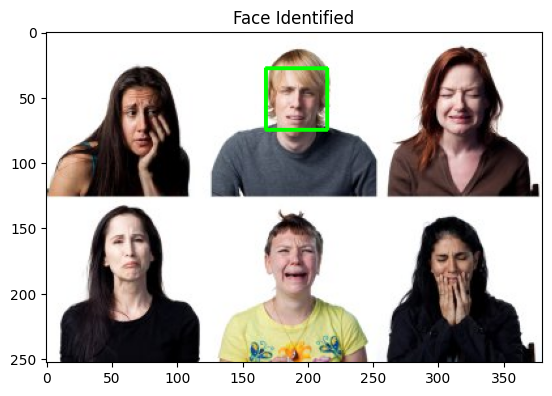

Width: 47, Height: 47
Predicted Gender: Female


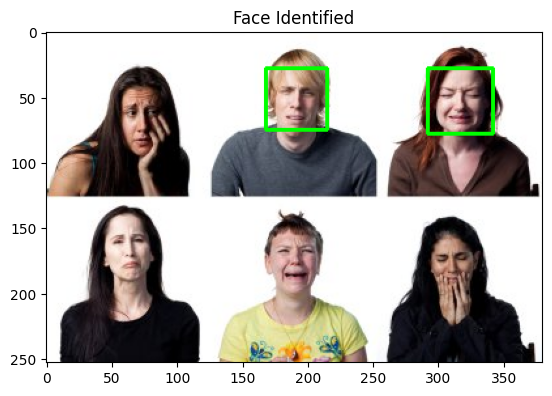

Width: 50, Height: 50
Predicted Gender: Female


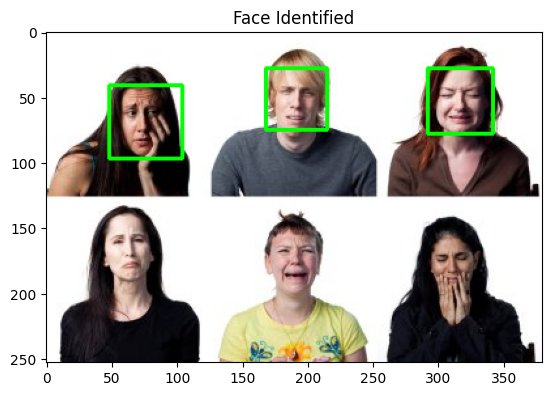

Width: 56, Height: 56
Predicted Gender: Female


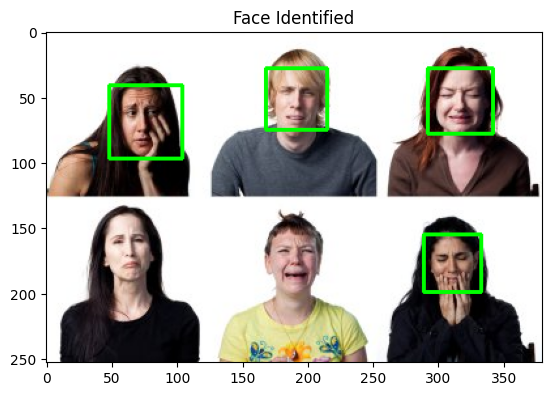

Width: 44, Height: 44
Predicted Gender: Female


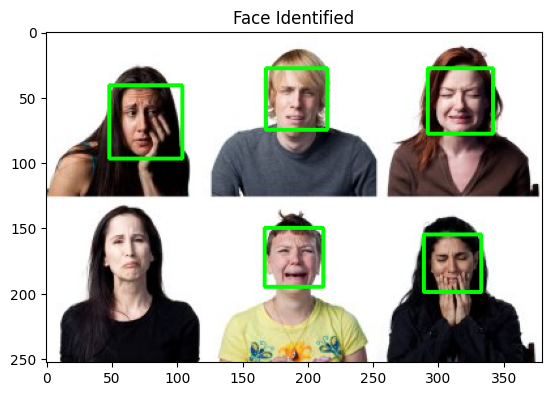

Width: 45, Height: 45
Predicted Gender: Female


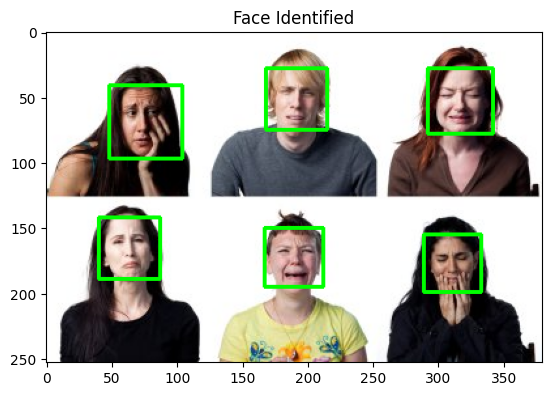

Width: 47, Height: 47
Predicted Gender: Female


In [12]:
import matplotlib.pyplot as plt

cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(cascade_path)

img_path = r"C:\Users\srira\Downloads\2.jpg"
img_loaded = cv2.imread(img_path)
img_gray = cv2.cvtColor(img_loaded, cv2.COLOR_BGR2GRAY)

detected_faces = face_detector.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)

if len(detected_faces) > 0:
    for (x, y, w, h) in detected_faces:
        cv2.rectangle(img_loaded, (x, y), (x+w, y+h), (0, 255, 0), 2)

        face_region = img_gray[y:y+h, x:x+w]
        face_normalized = cv2.resize(face_region, (200, 200))

        aspect_ratio = w / h

        plt.imshow(cv2.cvtColor(img_loaded, cv2.COLOR_BGR2RGB))
        plt.title("Face Identified")
        plt.show()

        if aspect_ratio > 1.0:
            gender_label = "Male"
        else:
            gender_label = "Female"

        print(f"Width: {w}, Height: {h}")
        print(f"Predicted Gender: {gender_label}")
else:
    print("No faces found in the image.")

